# Loading Dataset
MindSpore.dataset provides APIs to load and process datasets such as MNIST, CIFAR-10, CIFAR-100, VOC, ImageNet, and CelebA.

## Step 1 : Load the MNIST dataset

<function matplotlib.pyplot.show(close=None, block=None)>

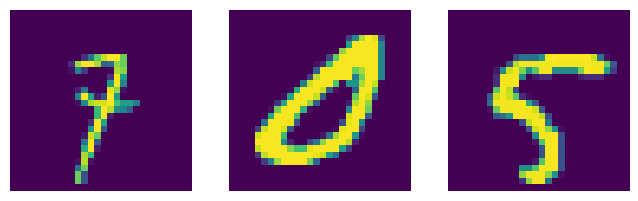

In [5]:
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt

dataset_dir = "../datasets/MNIST/train"   #Path of the dataset

#Read three images from the MNIST dataset
mnist_dataset = ds.MnistDataset(dataset_dir=dataset_dir, num_samples = 3)

#View the images and set the image sizes
plt.figure(figsize = (8,8))
i=1

#Print three subgraphs
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3, 3, i)
    plt.imshow(dic['image'][:, : , 0])
    plt.axis('off')
    i += 1
plt.show

## Step 2 : Customize a dataset

For datasets that cannot be directly loaded by MindSpore, you can build a custom dataset class and use the GeneratorDataset API to customize the data loading

In [4]:
import numpy as np
np.random.seed(58)

class DatasetGenerator:
    #When a dataset object is instatiated, the __init__ function is called. You can perform operations such as data initialization
    def __init__(self):
        self.data = np.random.sample((5, 2))
        self.label = np.random.sample((5, 1))
    #Define the __getitem__ function of the dataset class to support random access and obtain and return data in the dataset based on the specified index value
    def __getitem__(self, index):
        return self.data[index], self.label[index]
    #Define the __len__ function of the dataset class and return the number of samples in the dataset
    def __len__(self):
        return len(self.data)
#After the dataset class is defined, the GeneratorDataset API can be used to load and access dataset samples in custom mode
dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=False)
#Use the create_dict_iterator method to obtain data.
for data in dataset.create_dict_iterator():
        print ('{}'.format(data["data"]), '{}'.format(data["label"]))

[0.36510558 0.45120592] [0.78888122]
[0.49606035 0.07562207] [0.38068183]
[0.57176158 0.28963401] [0.16271622]
[0.30880446 0.37487617] [0.54738768]
[0.81585667 0.96883469] [0.77994068]


## Step 3 : Perform data augmentation. 
The dataset APIs provided by MindSpore support data processing methods such as shuffle and batch. You only need to call the corresponding function API to quickly process data. In the following example, the datasets are shuffled, and two samples form a batch.

In [6]:
ds.config.set_seed(58) # Shuffle the data sequence. buffer_size indicates the size of the shuffled buffer in the dataset. 
dataset = dataset.shuffle(buffer_size=10) # Divide the dataset into batches. batch_size indicates the number of data records contained in each batch. Set this parameter to 2. 
dataset = dataset.batch(batch_size=2) 
for data in dataset.create_dict_iterator(): 
    print("data: {}".format(data["data"])) 
    print("label: {}".format(data["label"]))

data: [[0.36510558 0.45120592]
 [0.57176158 0.28963401]]
label: [[0.78888122]
 [0.16271622]]
data: [[0.30880446 0.37487617]
 [0.49606035 0.07562207]]
label: [[0.54738768]
 [0.38068183]]
data: [[0.81585667 0.96883469]]
label: [[0.77994068]]


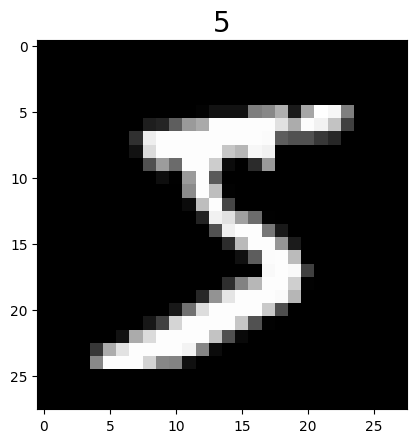

In [10]:
import matplotlib.pyplot as plt 
from mindspore.dataset.vision import Inter 
import mindspore.dataset.vision as c_vision 
DATA_DIR = "../datasets/MNIST/train" 

# Obtain six samples. 
mnist_dataset = ds.MnistDataset(DATA_DIR, num_samples=6, shuffle=False) 

# View the original image data. 
mnist_it = mnist_dataset.create_dict_iterator() 
data = next(mnist_it) 
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray) 
plt.title(data['label'].asnumpy(), fontsize=20) 
plt.show()

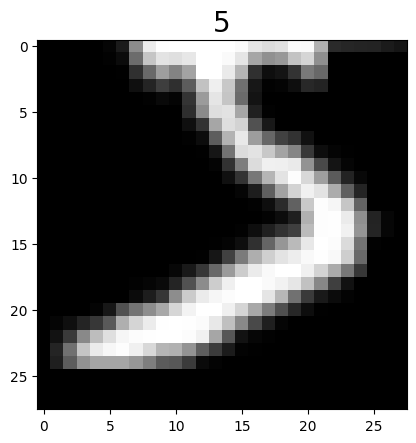

In [11]:
resize_op = c_vision.Resize(size=(40,40), interpolation=Inter.LINEAR) 
crop_op = c_vision.RandomCrop(28) 

transforms_list = [resize_op, crop_op] 

mnist_dataset = mnist_dataset.map(operations=transforms_list, input_columns=["image"]) 
mnist_dataset = mnist_dataset.create_dict_iterator() 
data = next(mnist_dataset) 
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray) 
plt.title(data['label'].asnumpy(), fontsize=20) 
plt.show()